In [1]:
# Generate grid for Jorge Montt Fjord
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io as sio
from utils import factors, polar_stereo, polar_xy_to_lonlat, polar_lonlat_to_xy, write_binary, interp_topo

In [2]:
def bathy_domain(west, east, south, north, plot=True):
    
    # Bathymetry data
    bathy_file = '/Users/weiyangbao/Documents/JorgeMontt/BakerMartinezBathymetry_v1.nc'
    #'/Users/weiyangbao/Documents/JorgeMontt/MGDS_Download/ChileanFjords_Piret/BakerMartinez_Bathymetry_v2.nc.gz'
    BMbathy = xr.open_dataset(bathy_file)
    Lon = BMbathy.Longitude.data
    Lat = BMbathy.latitude.data
    
    # Coastline data
    cst = scipy.io.loadmat('/Users/weiyangbao/Documents/JorgeMontt/jorgemontt/bathymetry/monttcoast.mat')
    
    lon = Lon[(Lon >= west) & (Lon <= east)]
    lat = Lat[(Lat >= south) & (Lat <= north)]
    elev = BMbathy.elevation.sel(latitude=lat, Longitude=lon).data
    
    lon += 360
    # Make lat in ascending order for later interpolation
    lat = np.flipud(lat)
    elev = np.flipud(elev)
    
    if plot:
        fig = plt.figure(figsize=(8,10))
        ax = fig.add_subplot(111)
        #elev[elev>0]=0
        plt.contourf(lon,lat,elev,40,cmap='jet')
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('Height [m]',fontsize=15)
        cbar.ax.tick_params(labelsize = 10)

        ax.plot(cst['lon']+360,cst['lat'],'k-')

        ax.set_xlabel(r'Longitude [$^\circ$]',fontsize=15)
        ax.set_ylabel(r'Latitude [$^\circ$]',fontsize=15)
        plt.title('Jorge Montt Fjord Bathymetry', weight='bold',fontsize=15)
        plt.show()
        
    return lon, lat, elev

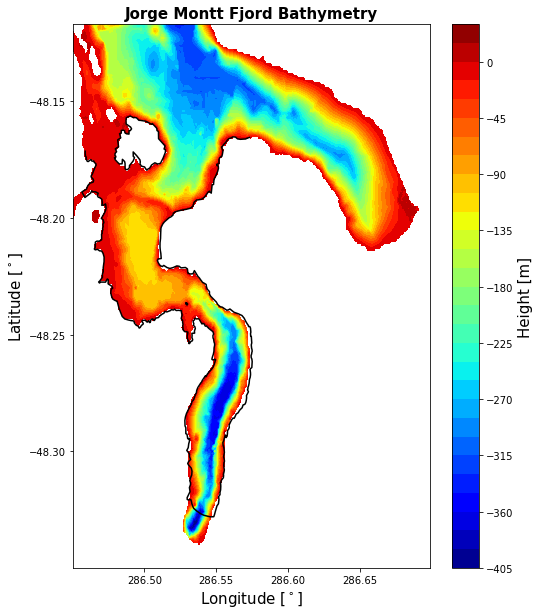

In [3]:
# Definine the domain of interest
minlon = -73-33/60
maxlon = -73-18/60
minlat = -48-21/60
maxlat = -48-7/60

lon, lat, z = bathy_domain(minlon, maxlon, minlat, maxlat,plot=True)

In [10]:
def interp_bathy(lon, lat, bathy, dx, dy, plot=True):
    
    # Convert lon and lat to polar stereographic coordinates
    lon_2d, lat_2d = np.meshgrid(lon, lat)
    x_interp, y_interp = polar_lonlat_to_xy(lon_2d, lat_2d)
    xmin, xmax, ymin, ymax = x_interp.min(), x_interp.max(), y_interp.min(), y_interp.max()
    
    # Build grid axis values
    x = np.arange(xmin, xmax+dx, dx)
    y = np.arange(ymin, ymax+dy, dy)

    # Find all the factors for the grid size
    Nx = x.size-1
    Ny = y.size-1
    factors_x = factors(Nx)
    factors_y = factors(Ny)
    print(('\nNx = ' + str(Nx) + ' which has the factors ' + str(factors_x)))
    print(('Ny = ' + str(Ny) + ' which has the factors ' + str(factors_y)))
    print('Good factors range is 15-30, choose your tile size based on the factors and update code/SIZE.h.')
    
    # Interpolate fields
    x_2d, y_2d = np.meshgrid(x,y)
    lon_interp, lat_interp = polar_xy_to_lonlat(x_2d, y_2d)
    print('Interpolating bathymetry')
    bathy_interp = interp_topo(lon, lat, z, lon_interp, lat_interp)
    
    if plot:
        fig = plt.figure(figsize=(8,10))
        ax = fig.add_subplot(111)
        plt.contourf(y, x, np.flipud(bathy_interp.T),20,cmap='jet')
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('Height [m]',fontsize=15)
        cbar.ax.tick_params(labelsize = 10)

        ax.set_xlabel(r'y [$km$]',fontsize=15)
        ax.set_ylabel(r'x [$km$]',fontsize=15)
        plt.title('Gridded Bathymetry', weight='bold',fontsize=15)
        plt.show()
        
    return x, y, bathy_interp


Nx = 168 which has the factors [1, 2, 3, 4, 6, 7, 8, 12, 14, 21, 24, 28, 42, 56, 84, 168]
Ny = 56 which has the factors [1, 2, 4, 7, 8, 14, 28, 56]
Good factors range is 15-30, choose your tile size based on the factors and update code/SIZE.h.
Interpolating bathymetry


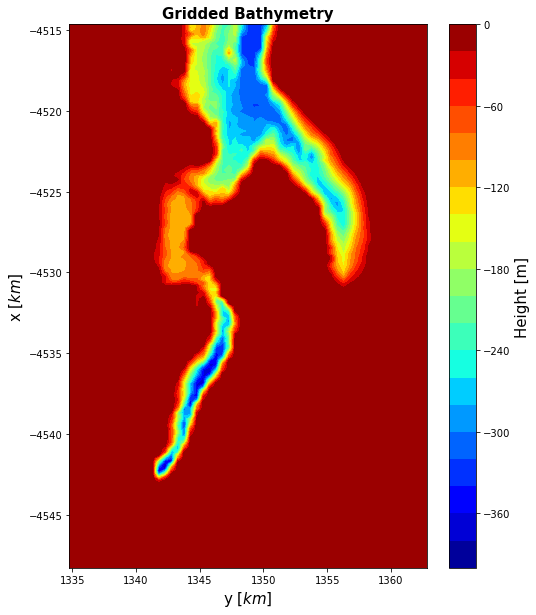

In [11]:
X,Y,Bathy = interp_bathy(lon, lat, z, 0.2, 0.5, plot=True)

In [12]:
Bathy[-1,:], Bathy[:,-3]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-8.06523490e-55, -1.54132228e-51, -2.50875364e-48, -1.83256436e-45,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.000

In [4]:
# Convert lon and lat to polar stereographic coordinates
lon_2d, lat_2d = np.meshgrid(lon, lat)
x_interp, y_interp = polar_lonlat_to_xy(lon_2d, lat_2d)
xmin, xmax, ymin, ymax = x_interp.min(), x_interp.max(), y_interp.min(), y_interp.max()

# Build grid axis values
dx = 0.2
dy = 0.5
x = np.arange(xmin, xmax+dx, dx)
y = np.arange(ymin, ymax+dy, dy)

# Find all the factors for the grid size
Nx = x.size-1
Ny = y.size-1
factors_x = factors(Nx)
factors_y = factors(Ny)
print(('\nNx = ' + str(Nx) + ' which has the factors ' + str(factors_x)))
print(('Ny = ' + str(Ny) + ' which has the factors ' + str(factors_y)))
print('Good factors range is 15-30, choose your tile size based on the factors and update code/SIZE.h.')


Nx = 168 which has the factors [1, 2, 3, 4, 6, 7, 8, 12, 14, 21, 24, 28, 42, 56, 84, 168]
Ny = 56 which has the factors [1, 2, 4, 7, 8, 14, 28, 56]
Good factors range is 15-30, choose your tile size based on the factors and update code/SIZE.h.


In [5]:
# Interpolate fields
x_2d, y_2d = np.meshgrid(x,y)
lon_interp, lat_interp = polar_xy_to_lonlat(x_2d, y_2d)
print('Interpolating bathymetry')
bathy_interp = interp_topo(lon, lat, z, lon_interp, lat_interp)


Interpolating bathymetry


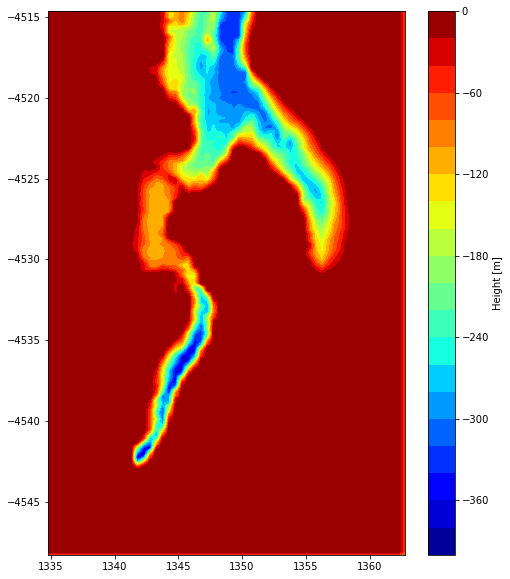

In [14]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111)
#bathy_interp[bathy_interp==0] = 'nan'
plt.contourf(y, x, np.flipud(bathy_interp.T),20,cmap='jet')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Height [m]')
cbar.ax.tick_params(labelsize = 10)

plt.show()

In [ ]:
bathy_file = '/Users/weiyangbao/Documents/JorgeMontt/BakerMartinezBathymetry_v1.nc'
#'/Users/weiyangbao/Documents/JorgeMontt/MGDS_Download/ChileanFjords_Piret/BakerMartinez_Bathymetry_v2.nc.gz'
BMbathy = xr.open_dataset(bathy_file)
Lon = BMbathy.Longitude.data
Lat = BMbathy.latitude.data

cst = scipy.io.loadmat('/Users/weiyangbao/Documents/JorgeMontt/jorgemontt/bathymetry/monttcoast.mat');
#cst = pd.read_csv('/Users/weiyangbao/Documents/JorgeMontt/jorgemontt/bathymetry/coastline/monttcoast.dat',sep="\s+",skiprows=1,names=['LON','LAT'])




lon = Lon[(Lon >= minlon) & (Lon <= maxlon)]
lat = Lat[(Lat >= minlat) & (Lat <= maxlat)]
elev = BMbathy.elevation.sel(latitude=lat, Longitude=lon).data

In [ ]:
# Convert lon and lat to polar stereographic coordinates
lon_2d, lat_2d = np.meshgrid(lon, lat)
x_interp, y_interp = polar_stereo(lon, lat)

In [ ]:
#lon.shape, lat.shape, elev.shape
#elev
#grid_x, grid_y = np.meshgrid(lon, lat)
#grid_x.shape, grid_y.shape
# X, Y = cst['lon'], cst['lat']
# #Y = data['']
# x = X[(X >= minlon) & (X <= maxlon)]
# y = Y[(Y >= minlat) & (Y <= maxlat)]
# ran1 = np.where((X >= minlon) & (X <= maxlon))
# ran2 = np.where((Y >= minlat) & (Y <= maxlat))
#a, b = X[ran], Y[ran]
#ran1, ran2,
#pcst.shape


In [ ]:
fig1, ax1 = plt.subplots(figsize=(6,8))  
# Plot potential temperature field

plt.contourf(y_interp,x_interp,np.flipud(elev),40,cmap='jet')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Height [m]')
cbar.ax.tick_params(labelsize = 10)

#ax1.plot(cst['lon'],cst['lat'],'k-')

ax1.set_xlabel(r'Longitude [$^\circ$]')
ax1.set_ylabel(r'Latitude [$^\circ$]')
plt.title('Jorge Montt Fjord Bathymetry', weight='bold')
plt.show()

In [ ]:
# Create the 2D grid points (regular lon and lat) based on the boundaries and resolution given by the user.
def latlon_points (minlon, maxlon, minlat, maxlat, dx, dy, dx_file, dy_file, prec=64):
    
    # Put longitutes in the range (0, 360) for namelist
    if minlon < 0:
        minlon += 360        
    if maxlon < 0:
        maxlon += 360
        
    # Convert lon and lat to polar stereographic coordinates
    lon_2d, lat_2d = np.meshgrid(np.array([minlon,maxlon]), np.array([minlat,maxlat]))
    x_interp, y_interp = polar_stereo(lon_2d, lat_2d)
    xmin, xmax, ymin, ymax = x_interp.min(), x_interp.max(), y_interp.min(), y_interp.max()
    

    # Build longitude values
    x = np.arange(xmin, xmax+dx, dx)
    y = np.arange(ymin, ymax+dx, dx)
    

    # Write latitude resolutions to file
    write_binary(x, dx_file, prec=prec)
    write_binary(y, dy_file, prec=prec)

    # Remind the user what to do in their namelist
    print('\nChanges to make to input/data:')

    print(('dxSpacing=' + str(dx)))
    print(('dySpacing=' + str(dy)))
    print(("delXfile='" + dx_file + "' (and copy this file into input/)"))
    print(("delYfile='" + dy_file + "' (and copy this file into input/)"))

    # Find dimensions of tracer grid
    Nx = x.size
    Ny = y.size
    # Find all the factors
    factors_x = factors(Nx)
    factors_y = factors(Ny)
    print(('\nNx = ' + str(Nx) + ' which has the factors ' + str(factors_x)))
    print(('Ny = ' + str(Ny) + ' which has the factors ' + str(factors_y)))
    print('Good factors range is 15-30, choose your tile size based on the factors and update code/SIZE.h.')
    
    return x, y

In [ ]:
lon.min(), lon.max()

In [ ]:
a,s = latlon_points (minlon, maxlon, minlat, maxlat, 200, 1000, 'delx.bin', 'dely.bin');
a, s

In [ ]:
# Find all the factors of the integer n.
def factors (n):

    factors = []
    for i in range(1, n+1):
        if n % i == 0:
            factors.append(i)
    return factors



In [ ]:
#elev_rot.shape, lon_rot.shape
A, B = latlon_points(minlon, maxlon, minlat, maxlat, 0.01, 'delY_WSK')

In [ ]:
fig2, ax2 = plt.subplots(figsize=(6,8))
plt.contourf(lon_rot,lat_rot,elev_rot,40,cmap='jet')
cbar = plt.colorbar()


cbar.ax.set_ylabel('Depth [m]')
cbar.ax.tick_params(labelsize = 10)
ax2.set_xlabel(r'Longitude [$^\circ$]')
ax2.set_ylabel(r'Latitude [$^\circ$]')
plt.title('Jorge Montt Fjord Bathymetry', weight='bold')
plt.show()